In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import pickle
import plotly
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
plotly.offline.init_notebook_mode()
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from IPython.display import Image

In [2]:
df = pd.read_csv('./datasets/Consumo_cerveja.csv', sep=';')
df.head(10)

data  temp_media  temp_min  temp_max  chuva  fds  consumo
0  01/01/2015       27.30      23.9      32.5    0.0    0    25461
1  02/01/2015       27.02      24.5      33.5    0.0    0    28972
2  03/01/2015       24.82      22.4      29.9    0.0    1    30814
3  04/01/2015       23.98      21.5      28.6    1.2    1    29799
4  05/01/2015       23.82      21.0      28.3    0.0    0    28900
5  06/01/2015       23.78      20.1      30.5   12.2    0    28218
6  07/01/2015       24.00      19.5      33.7    0.0    0    29732
7  08/01/2015       24.90      19.5      32.8   48.6    0    28397
8  09/01/2015       28.20      21.9      34.0    4.4    0    24886
9  10/01/2015       26.76      22.1      34.2    0.0    1    37937

In [3]:
df_table = ff.create_table(df.head(10))
py.iplot(df_table)

In [4]:
df.shape

(365, 7)

### Analise Preliminares

#### Estatistica descritivas

In [5]:
df.describe().round(2)

temp_media  temp_min  temp_max   chuva     fds   consumo
count      365.00    365.00    365.00  365.00  365.00    365.00
mean        21.23     17.46     26.61    5.20    0.28  25401.37
std          3.18      2.83      4.32   12.42    0.45   4399.14
min         12.90     10.60     14.50    0.00    0.00  14343.00
25%         19.02     15.30     23.80    0.00    0.00  22008.00
50%         21.38     17.90     26.90    0.00    0.00  24867.00
75%         23.28     19.60     29.40    3.20    1.00  28631.00
max         28.86     24.50     36.50   94.80    1.00  37937.00

#### Matriz de correlação

<p style='font-size: 14px; line-height: 2; margin: 0px 0px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [6]:
df.corr().round(4)

temp_media  temp_min  temp_max   chuva     fds  consumo
temp_media      1.0000    0.8628    0.9225  0.0244 -0.0508   0.5746
temp_min        0.8628    1.0000    0.6729  0.0986 -0.0595   0.3925
temp_max        0.9225    0.6729    1.0000 -0.0493 -0.0403   0.6427
chuva           0.0244    0.0986   -0.0493  1.0000  0.0016  -0.1938
fds            -0.0508   -0.0595   -0.0403  0.0016  1.0000   0.5060
consumo         0.5746    0.3925    0.6427 -0.1938  0.5060   1.0000

### Comportamento da Variavel Dependente (Y)

#### Plot da Variavel dependente (y)
#### Subplots

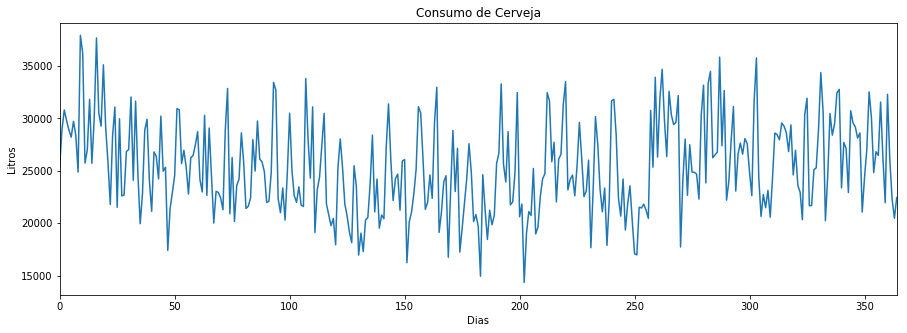

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Consumo de Cerveja')
ax.set_ylabel('Litros')
ax.set_xlabel('Dias')
ax = df['consumo'].plot()

In [8]:
x1 = df.data
y1 = df.consumo
data = [go.Scatter(x=x1, y=y1)]
fig = go.Figure(data=data)
py.iplot(fig)

#### Box plot

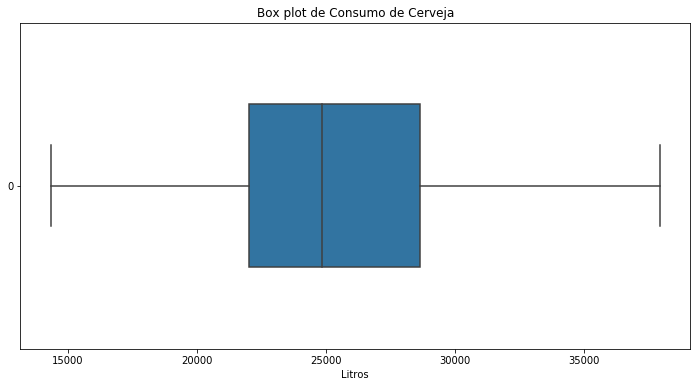

In [9]:
ax = sns.boxplot(data=df['consumo'], orient='h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot de Consumo de Cerveja')
ax.set_xlabel('Litros')
ax

In [10]:
x1 = df.consumo
trace0 = go.Box(x=x1)
data = [trace0]
py.iplot(data)

#### Box plot com duas variaveis

In [11]:
sns.set_style('darkgrid')

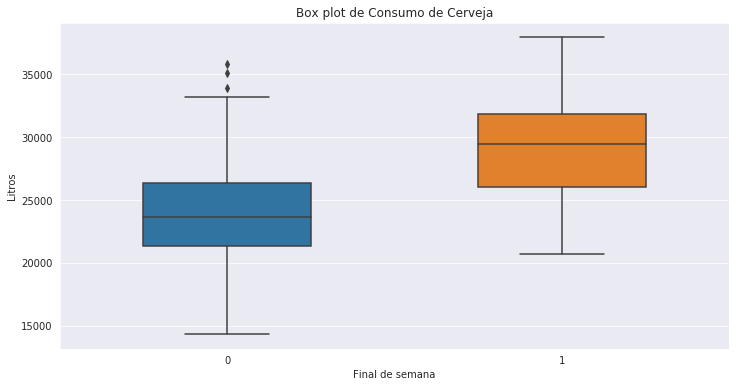

In [12]:
ax = sns.boxplot(y='consumo',x='fds',data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot de Consumo de Cerveja')
ax.set_xlabel('Final de semana')
ax.set_ylabel('Litros')
ax

In [13]:
trace0 = go.Box(
    y=df.consumo,
    x=df.fds
)
trace1 = go.Box(
    y=df.consumo,
    x=df.fds
)
data = [trace0, trace1]
py.iplot(data)

### Distribuição de Frequencias

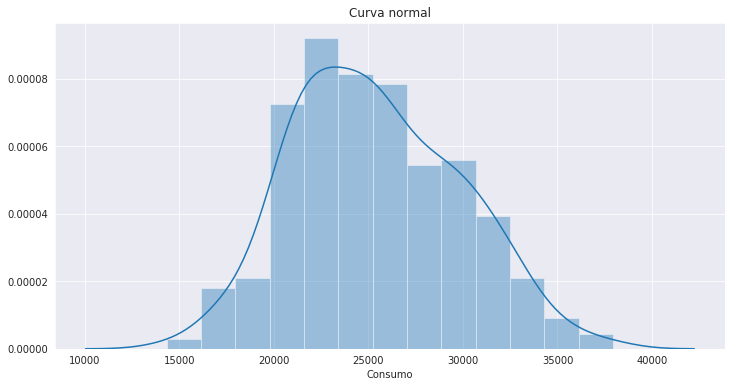

In [14]:
ax = sns.distplot(df['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Curva normal')
ax.set_xlabel('Consumo')
ax

### Variaveis dependentes & Variaveis explicativas

#### pairplot

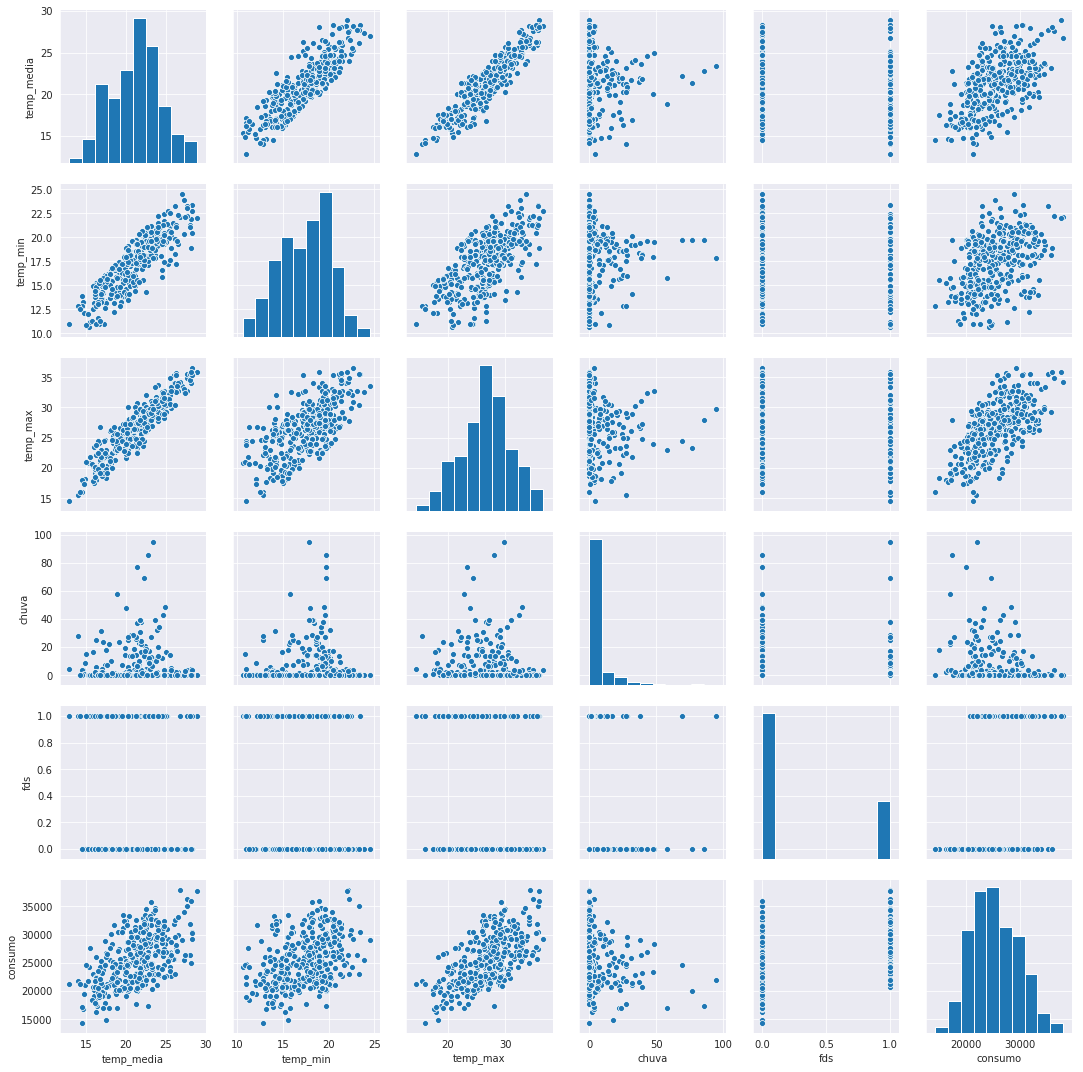

In [15]:
ax = sns.pairplot(df)
ax

In [16]:
classes = np.unique(df['consumo'].values.tolist())
class_code = {classes[k]: k for k in range(len(classes))}
text = [df.loc[ k, 'consumo'] for k in range(len(df))]

In [17]:
trace1 = go.Splom(dimensions=[dict(label='temp_max',
                                 values=df['temp_max']),
                            dict(label='chuva',
                                 values=df['chuva']),
                            dict(label='fds',
                                 values=df['fds']),
                            dict(label='consumo',
                                 values=df['consumo'])],
                text=text,
                marker=dict(size=7,
                            showscale=False,
                            line=dict(width=0.5,
                                      color='rgb(230,230,230)'))
                )

In [18]:
axis = dict(showline=True,
          zeroline=False,
          gridcolor='#fff',
          ticklen=4)

layout = go.Layout(
    title='matriz de dispersão',
    dragmode='select',
    width=600,
    height=600,
    autosize=False,
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240, 0.95)',
    xaxis1=dict(axis),
    xaxis2=dict(axis),
    xaxis3=dict(axis),
    xaxis4=dict(axis),
    yaxis1=dict(axis),
    yaxis2=dict(axis),
    yaxis3=dict(axis),
    yaxis4=dict(axis)
)

fig1 = dict(data=[trace1], layout=layout)
py.iplot(fig1)

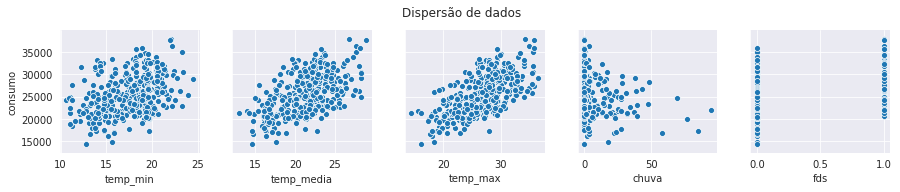

In [19]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'])
ax.fig.suptitle('Dispersão de dados',fontsize=12,y=1.05)
ax

#### Reta de regressão estimada

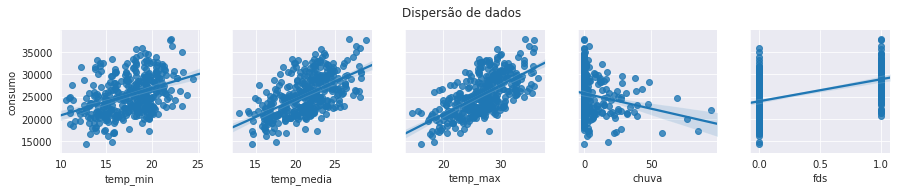

In [20]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'],kind='reg')
ax.fig.suptitle('Dispersão de dados',fontsize=12,y=1.05)
ax

#### joinplot
<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

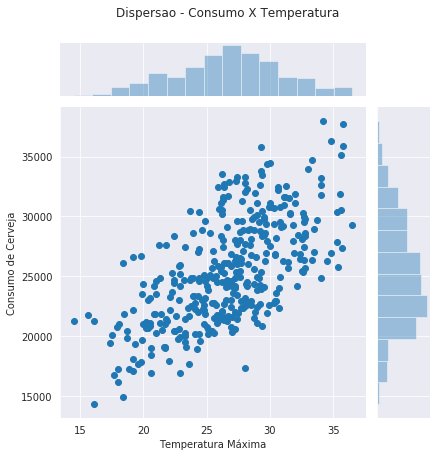

In [21]:
ax = sns.jointplot(x="temp_max", y="consumo", data=df)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja")
ax

#### Reta de regressão estimada

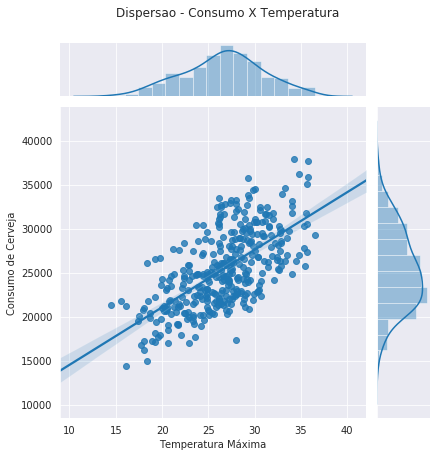

In [22]:
ax = sns.jointplot(x="temp_max", y="consumo", data=df,kind='reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja")
ax

#### lmplot
<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

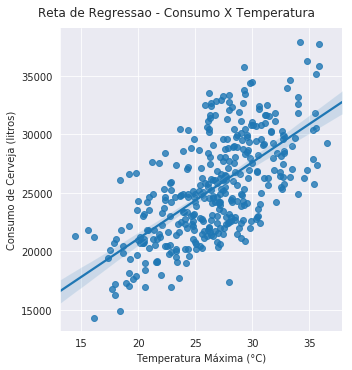

In [23]:
ax = sns.lmplot(x="temp_max", y="consumo", data=df)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)")
ax.set_ylabels("Consumo de Cerveja (litros)")
ax

#### lmplot - Tipo I
<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>Plot utilizando uma terceira variável na análise.</p>

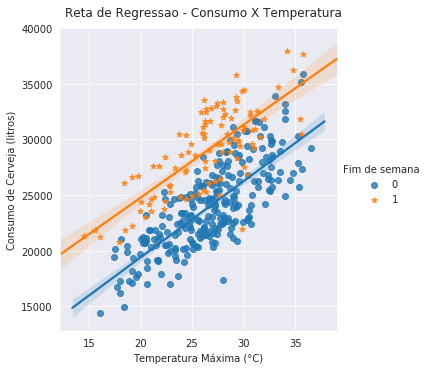

In [24]:
ax = sns.lmplot(x="temp_max", y="consumo", data=df, hue='fds', markers=['o','*'], legend=False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)")
ax.set_ylabels("Consumo de Cerveja (litros)")
ax.add_legend(title='Fim de semana')
ax

#### lmplot - Tipo II
<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>Plot utilizando uma terceira variável na análise.</p>

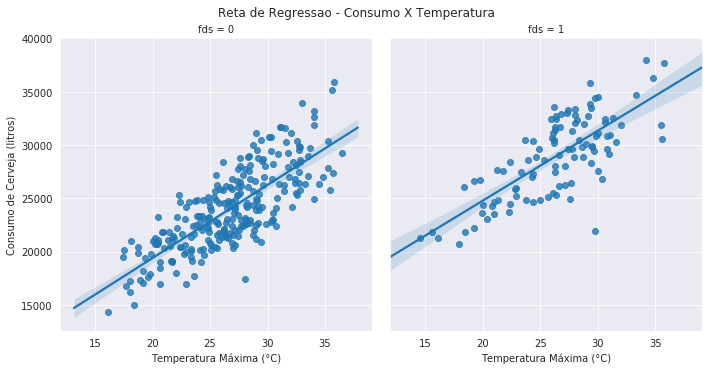

In [25]:
ax = sns.lmplot(x="temp_max", y="consumo", data=df, col='fds')
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)")
ax.set_ylabels("Consumo de Cerveja (litros)")
ax

### Estimando um Modelo de Regressão Linear para o Consumo
#### Regresão Linear
<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>

#### Criando uma Series (pandas) para armazenar o Consumo de Cerveja (variável dependente) (y)

In [26]:
y = df['consumo']
type(y)

pandas.core.series.Series

#### Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [27]:
X = df[['temp_max','chuva','fds']]
type(X)

pandas.core.frame.DataFrame

#### Criando os datasets de treino e de teste

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

#### Verificando os tamanhos dos arquivos gerados pela função train_test_split

In [29]:
print('df =>',df.shape)
print('')
print('X =>',X.shape)
print('y =>',y.shape)
print('')
print('X_train =>',X_train.shape)
print('X_test =>',X_test.shape)
print('y_train =>',y_train.shape)
print('y_test =>',y_test.shape)

df => (365, 7)

X => (365, 3)
y => (365,)

X_train => (255, 3)
X_test => (110, 3)
y_train => (255,)
y_test => (110,)


In [30]:
print(X_train.shape[0] + X_test.shape[0])

365


In [31]:
print('test =>',X.shape[0] * 0.3)
print('train =>',X.shape[0] * 0.7)

test => 109.5
train => 255.49999999999997


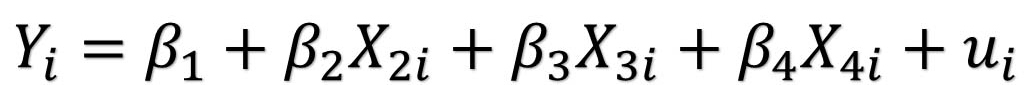

In [32]:
# Função de Regressão linear com Três variáveis explicativas
Image('./datasets/imagens/reg_001.jpg', width=500, height=500)

#### Instância da classe LinearRegression( )

In [33]:
modelo = LinearRegression()

#### Criando Estimativa do modelo linear utilizando os dados de TREINO (X_train e y_train)

In [34]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

##### Coeficiente de Determinação - R²
O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [35]:
print(f'R² = {modelo.score(X_train,y_train).round(2)}')

R² = 0.73


#### Previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"

In [36]:
y_previsto = modelo.predict(X_test)

#### Coeficiente de Determinação para previsões do modelo

In [37]:
print(f'R² = {metrics.r2_score(y_test,y_previsto).round(2)}')

R² = 0.69


### Previsões pontuais

#### Entrada

In [38]:
entrada = X_test[0:1]
entrada

temp_max  chuva  fds
5      30.5   12.2    0

#### Previsão do consumo médio de cerveja em litros

In [39]:
modelo.predict(entrada)[0]

26094.901775262013

#### Simulador simples

In [40]:
temp_max = 40.0
chuva = 0
fds = 1
entrada = [[temp_max,chuva,fds]]
print(f'{modelo.predict(entrada)[0].round(2)} litros')

38742.53 litros


### Interpretação dos coeficientes estimados

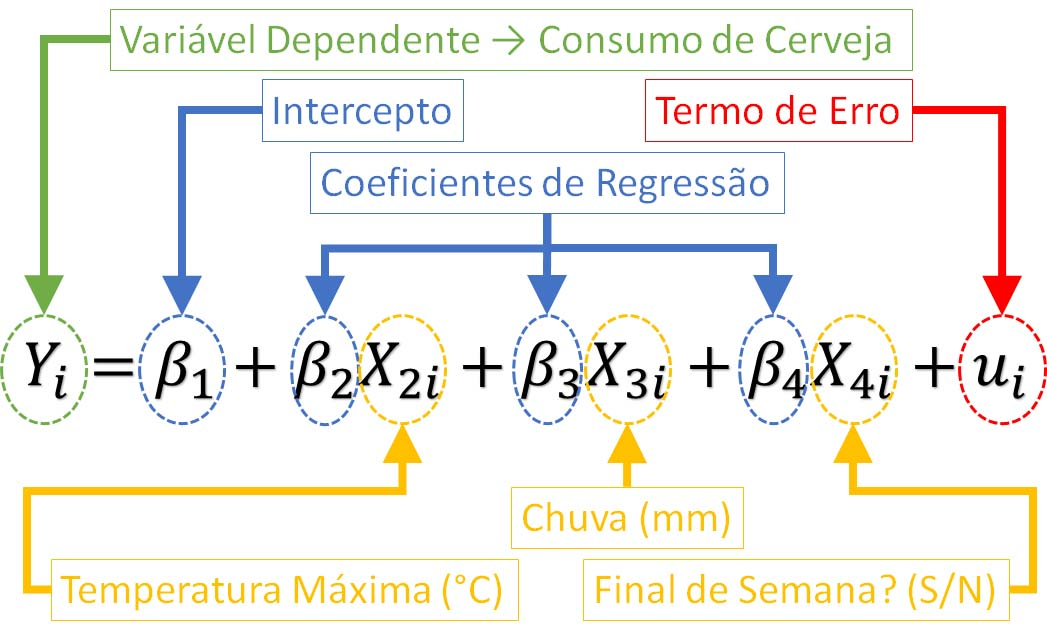

In [41]:
Image('./datasets/imagens/reg_02.jpg',width=800,height=800)

#### Obtendo o intercepto do modelo

<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [42]:
modelo.intercept_

5951.9763393124485

#### Obtendo os coeficientes de regressão

<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [43]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [44]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

#### Lista com variaveis do modelo

In [45]:
index = ['Intercepto','Temperatura Máxima','Chuva (mm)','Final de semana']

#### Dataframe para armazenar coeficientes

In [46]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index, columns=['Parâmetros'])

Parâmetros
Intercepto          5951.976339
Temperatura Máxima   684.736759
Chuva (mm)           -60.782435
Final de semana     5401.083339

#### Interpretação dos Coeficientes Estimados

<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 5px 1px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

### Analise gráfica das Previsões do Modelo

#### Dados de treino

In [47]:
y_train_previsto = modelo.predict(X_train)

#### Dispersão entre o valor estimado e o valor real

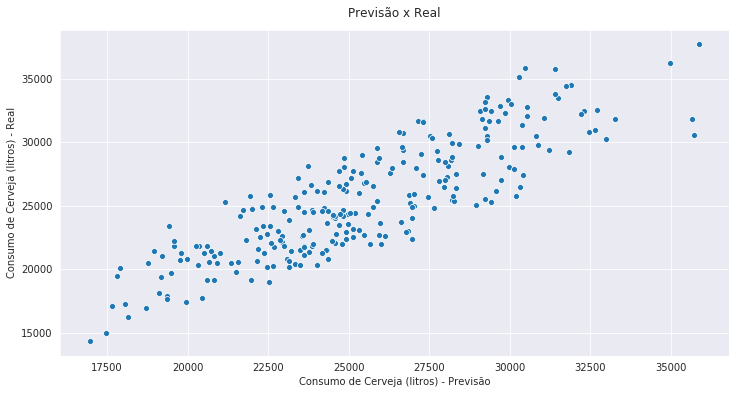

In [48]:
ax = sns.scatterplot(x=y_train_previsto, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', y=1.02)
ax.set_xlabel("Consumo de Cerveja (litros) - Previsão")
ax.set_ylabel("Consumo de Cerveja (litros) - Real")
ax

#### Resíduos

In [49]:
residuo = y_train - y_train_previsto

#### Gráfico de dispersão entre o valor estimado e resíduos
Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

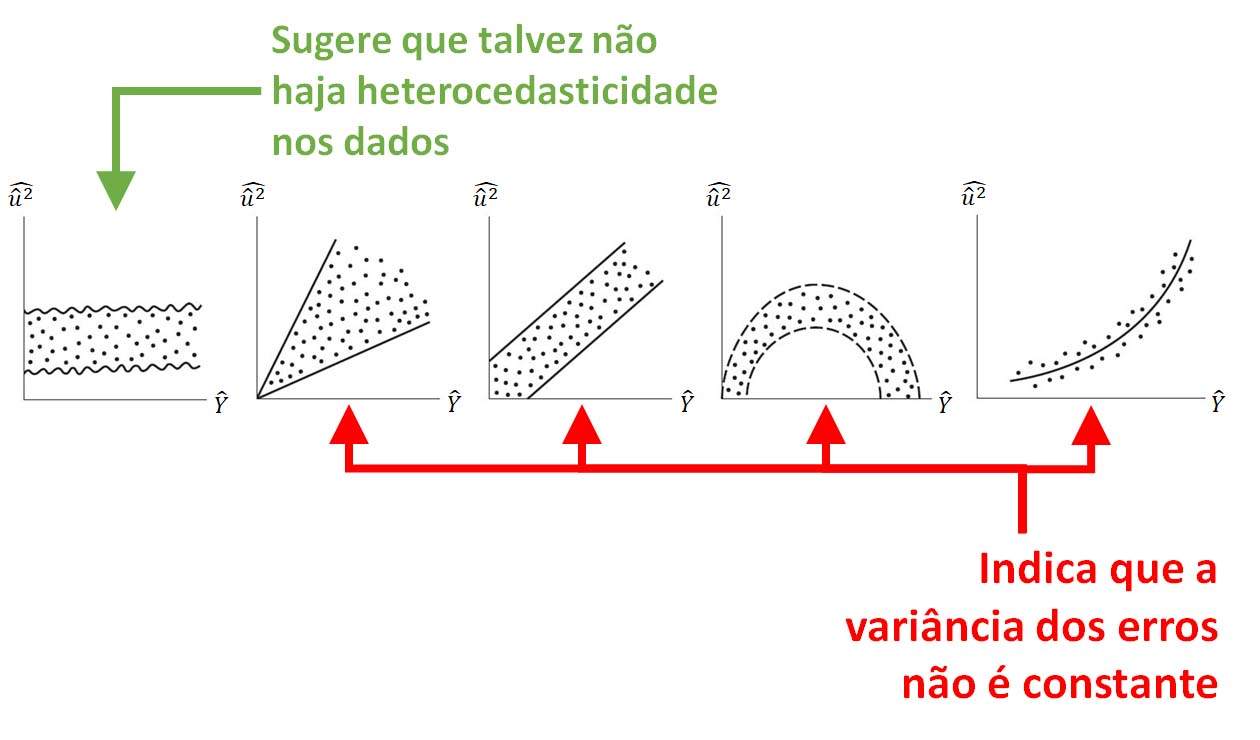

In [50]:
Image('./datasets/imagens/var_u.jpg',width=700,height=700)

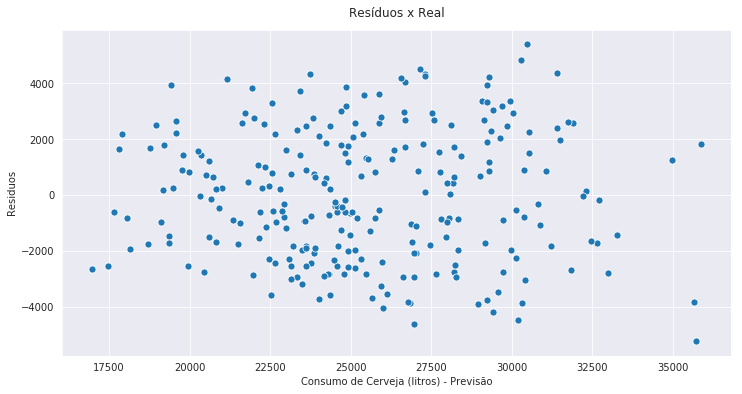

In [51]:
ax = sns.scatterplot(x=y_train_previsto, y=residuo, s=50)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos x Real', y=1.02)
ax.set_xlabel("Consumo de Cerveja (litros) - Previsão")
ax.set_ylabel("Residuos")
ax

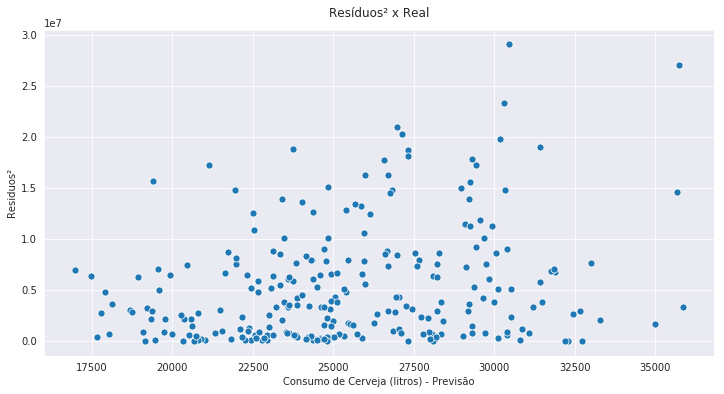

In [52]:
ax = sns.scatterplot(x=y_train_previsto, y=residuo**2, s=50)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos² x Real', y=1.02)
ax.set_xlabel("Consumo de Cerveja (litros) - Previsão")
ax.set_ylabel("Residuos²")
ax

#### Distribuição de Frequencias

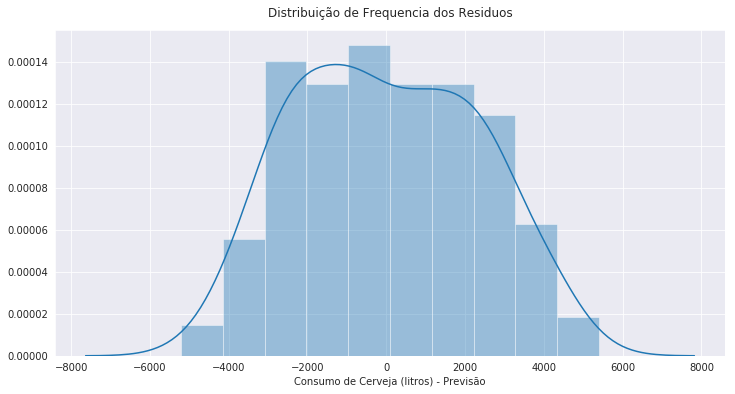

In [53]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequencia dos Residuos', y=1.02)
ax.set_xlabel("Consumo de Cerveja (litros) - Previsão")
ax

### Comparação de modelos

#### Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [54]:
X2 = df[['temp_media','chuva','fds']]

#### Criando os datasets de treino e de teste

In [55]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

#### Instanciando a classe *LinearRegression()*

In [56]:
modelo_2 = LinearRegression()

#### Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (X2_train e y2_train)

In [57]:
modelo_2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [58]:
print(f'Modelo com temp max')
print(f'R² = {modelo.score(X_train,y_train).round(2)}')

Modelo com temp max
R² = 0.73


In [59]:
print(f'Modelo com temp media')
print(f'R² = {modelo_2.score(X2_train,y2_train).round(2)}')

Modelo com temp media
R² = 0.66


#### Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [60]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

#### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [61]:
print(f'Modelo com temp max')
print(f'R² = {metrics.r2_score(y_test,y_previsto).round(2)}')

Modelo com temp max
R² = 0.69


In [62]:
print(f'Modelo com temp media')
print(f'R² = {metrics.r2_score(y2_test,y_previsto_2).round(2)}')

Modelo com temp media
R² = 0.66


### Outras Métricas de Regressão

#### Métricas da regressão

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

#### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

#### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



##### Obs: Quanto menor o erro quadratico médio, melhor pra predição de seu modelo.
##### Obs: Quanto maior o R², melhor para predição de seu modelo.

#### Métricas para o modelo com 'temp_max'

In [63]:
eqm_2 = metrics.mean_squared_error(y2_test,y_previsto_2).round(2)
reqm_2 = np.sqrt(metrics.mean_squared_error(y2_test,y_previsto_2)).round(2)
r2_2 = metrics.r2_score(y2_test,y_previsto_2).round(2)

pd.DataFrame([eqm_2, reqm_2, r2_2], 
             ['erro_quadratico_medio', 'raiz_erro_quadratico_medio','r²'],
            columns=['Métricas'])

Métricas
erro_quadratico_medio       6060775.46
raiz_erro_quadratico_medio     2461.86
r²                                0.66

#### Métricas para o modelo com 'temp_max'

In [64]:
eqm = metrics.mean_squared_error(y_test,y_previsto).round(2)
reqm = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
r2 = metrics.r2_score(y_test,y_previsto).round(2)

pd.DataFrame([eqm, reqm, r2], 
             ['erro_quadratico_medio', 'raiz_erro_quadratico_medio','r²'],
            columns=['Métricas'])

Métricas
erro_quadratico_medio       5471976.38
raiz_erro_quadratico_medio     2339.23
r²                                0.69

### Salvando e Carregando o Modelo Estimado

#### Dados de entrada

In [65]:
entrada = X_test[0:1]
entrada

temp_max  chuva  fds
5      30.5   12.2    0

#### Previsão pontual

In [66]:
modelo.predict(entrada)[0]

26094.901775262013

#### Simulador simples

In [67]:
temp_max = 30.5
chuva = 12.2
fds = 0 

entrada=[[temp_max,chuva,fds]]
print(f'{modelo.predict(entrada)[0].round(2)} litros')

26094.9 litros


#### Salvando o modelo estimado

In [68]:
output = open('./datasets/modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

#### Novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```